# Generate Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker  as plticker
import seaborn as sns
sns.set()
#plt.style.use('dark_background')
np.random.seed(1)
%matplotlib inline
# Generate data.
# Number of features
num_inputs = 1
# Number of observations
num_examples = 1000
# True parameters
true_w = 3
true_b = 4.2
# Feature Matrix
X = np.random.normal(scale=1, size=(num_examples, num_inputs))
X = np.hstack((np.ones((X.shape[0], 1)), X))
# Label 
y = true_w * X[:, 1] + true_b
# Add noise
y += .01 * np.random.normal(scale=100, size=y.shape)

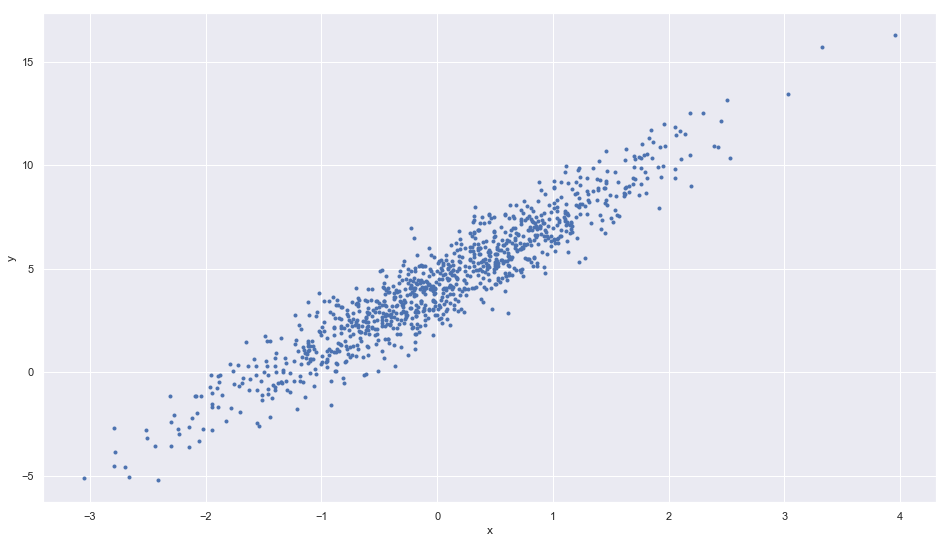

In [4]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(X[:,1],y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Vanilla GD

Text(0, 0.5, 'Weights')

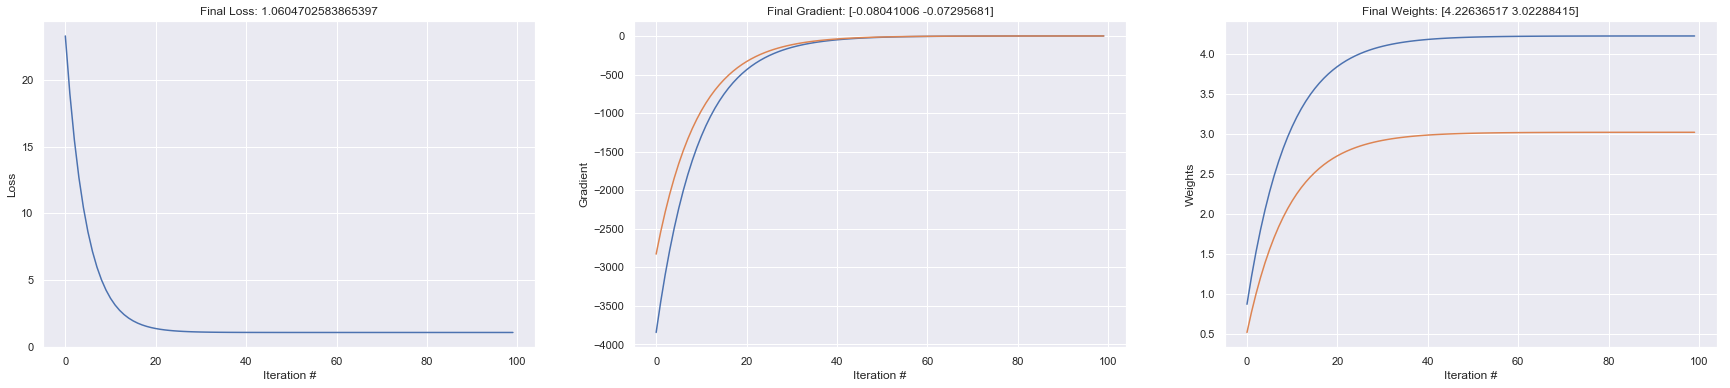

In [5]:
weights_history = []
loss_history = []
gradient_history = []
W = np.random.normal(size=2)
lr = 0.0001
for i in range(100):
    error = np.dot(X,W) - y
    #Record the Sum of Squared errors
    loss = np.dot(error,error)/len(X)
    loss_history.append(loss)
    gradient = np.dot(X.T, error)
    gradient_history.append(gradient)
    W = W - lr * gradient
    weights_history.append(W)

fig = plt.figure(figsize=(30, 6)) 
ax0 = plt.subplot(131)
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(132)
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(133)
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Weights')

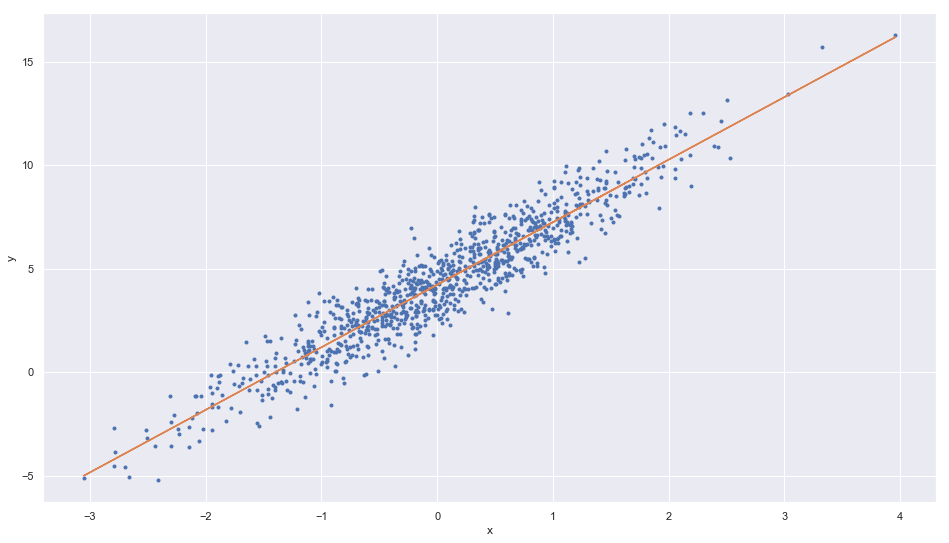

In [6]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(X[:,1],y,'.')
yhat = np.dot(X,W)
plt.plot(X[:,1],yhat)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# SGD

In [7]:
# Construct data iterator.
def data_iter(batch_size):
    idx = list(range(num_examples))
    np.random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = np.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X[j],y[j]

Text(0, 0.5, 'Weights')

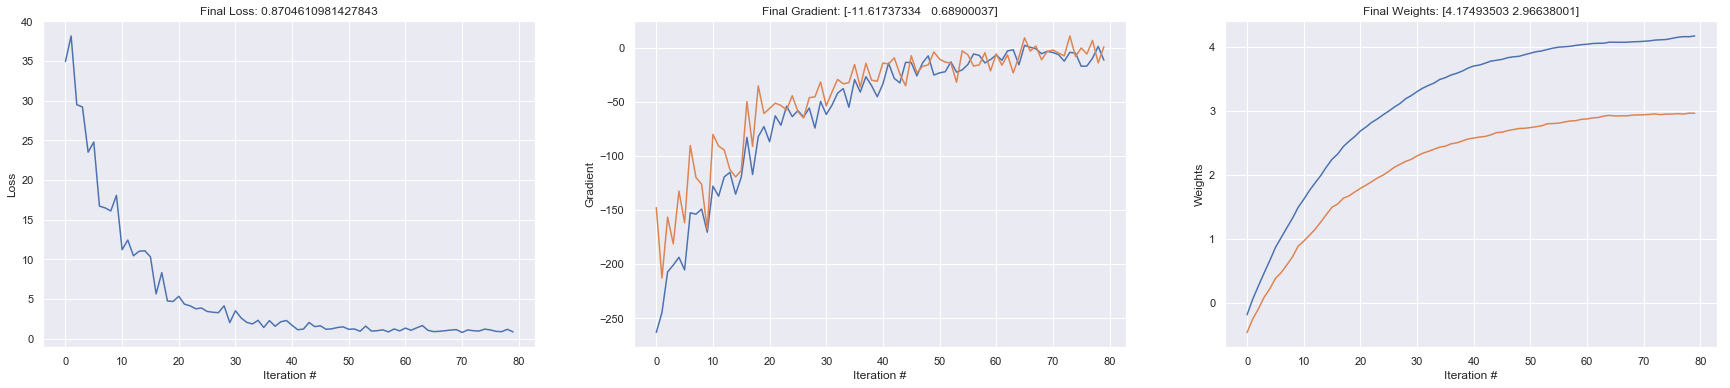

In [8]:
epochs = 4
batch_size = 50
weights_history = []
loss_history = []
gradient_history = []
W = np.random.normal(size=2)
lr = 0.001
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        W = W - lr*grad
        weights_history.append(W)

        
        
fig = plt.figure(figsize=(30, 6)) 
ax0 = plt.subplot(131)
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(132)
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(133)
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Weights')

# SGD with Momentum

Text(0, 0.5, 'Momentum')

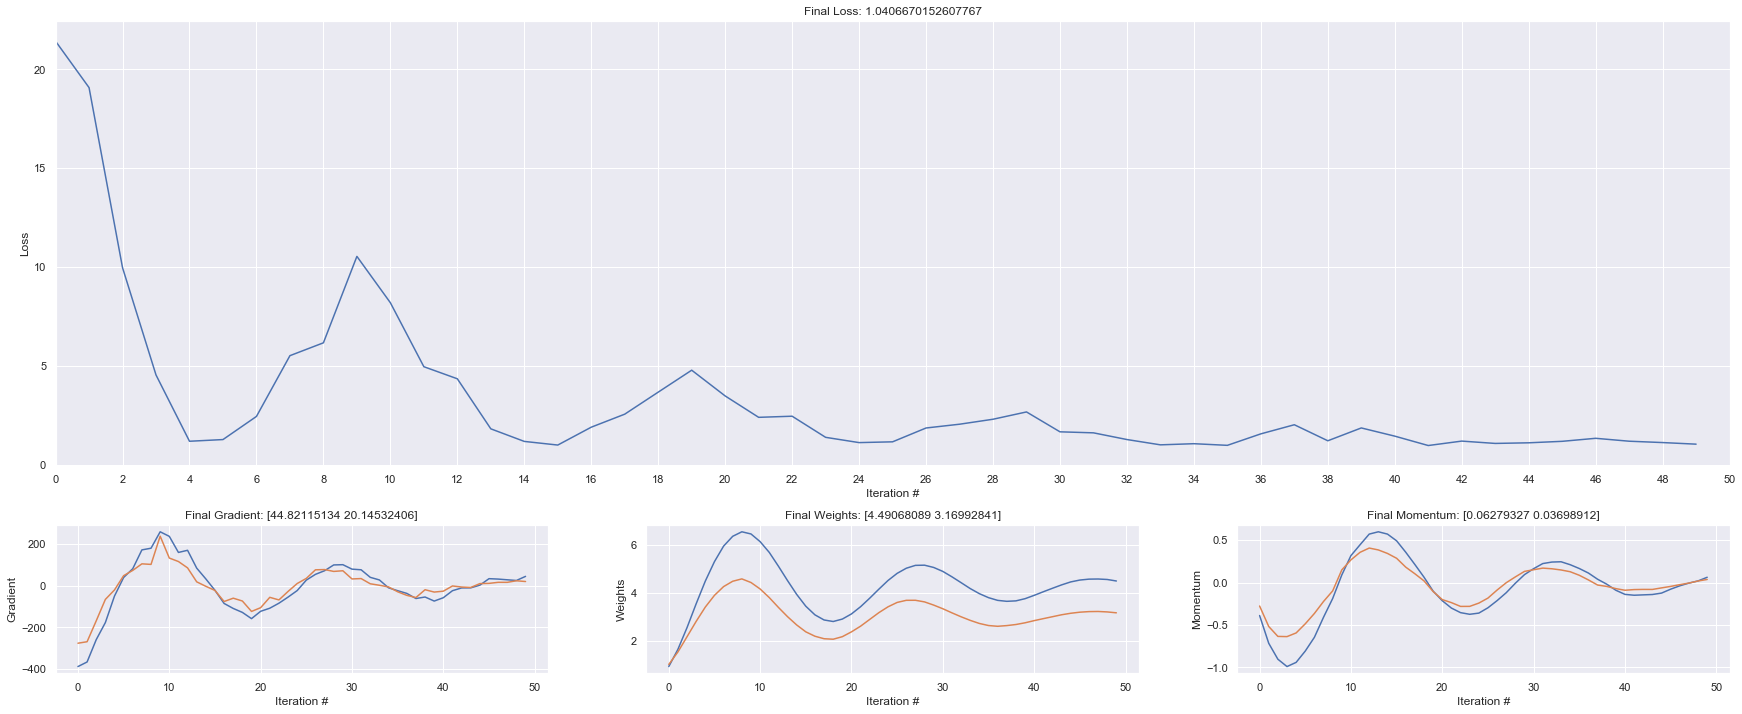

In [22]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
momentum_history = []
gamma = 0.9
W = np.random.normal(size=2)
lr = 0.001
v = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        v = gamma * v + lr * grad
        momentum_history.append(v)
        W = W - v
        weights_history.append(W)

        
gs=GridSpec(2,3,height_ratios=[3, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[1,2])
ax3.plot(momentum_history)
ax3.set_title('Final Momentum: ' + str(momentum_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('Momentum')

# Nesterov SGD

Text(0, 0.5, 'Momentum')

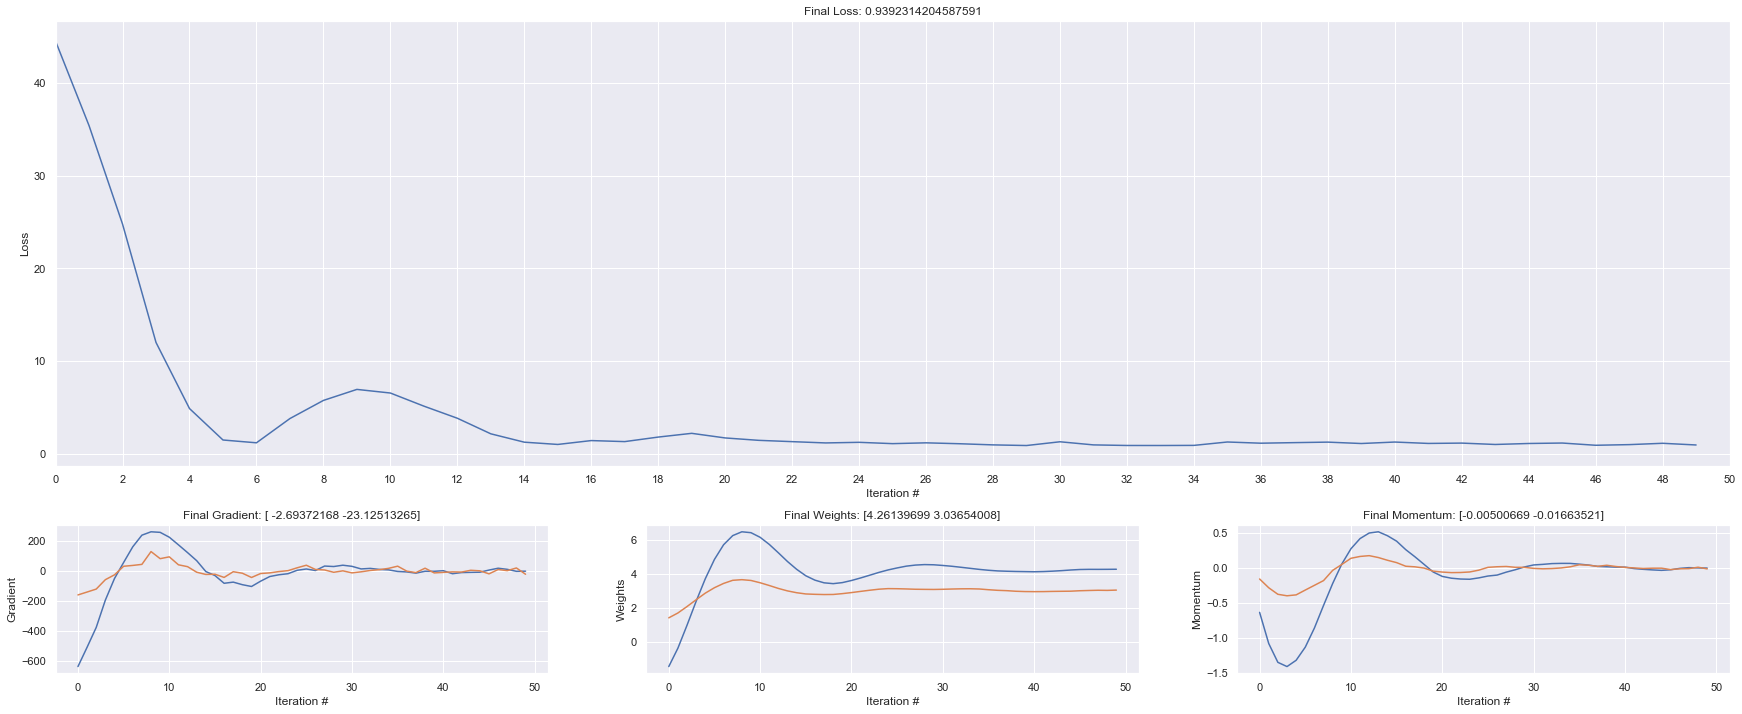

In [23]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
momentum_history = []
gamma = 0.9
W = np.random.normal(size=2)
lr = 0.001
v = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        #grad = np.dot(data.T, err)
        n_W = W - gamma * v
        n_err = np.dot(data,n_W) - label
        n_grad = np.dot(data.T, n_err)
        gradient_history.append(n_grad)
        v = gamma * v + lr * n_grad
        momentum_history.append(v)
        W = W - v
        weights_history.append(W)
        
gs=GridSpec(2,3,height_ratios=[3, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[1,2])
ax3.plot(momentum_history)
ax3.set_title('Final Momentum: ' + str(momentum_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('Momentum')

# RMSProp

Text(0, 0.5, 's')

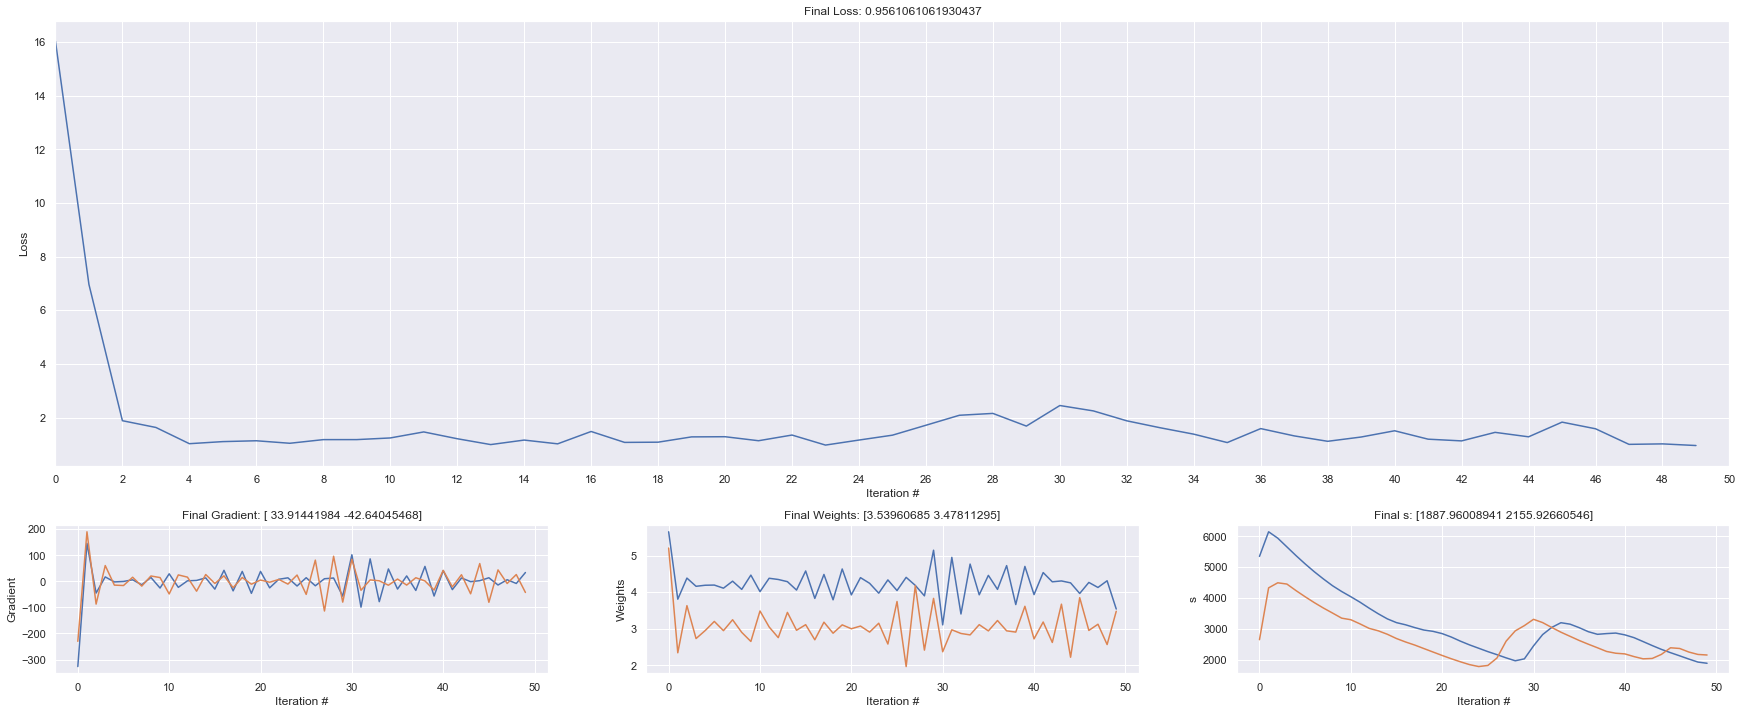

In [36]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
W = np.random.normal(size=2)
lr = 0.99
s = 0
e = 10 ** -8
gamma = 0.95
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        s = gamma * s + (1-gamma) * grad ** 2
        s_history.append(s)
        W = W - lr/np.sqrt(s + e) * grad
        weights_history.append(W)
        
gs=GridSpec(2,3,height_ratios=[3, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.plot(loss_history)
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[1,2])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')

# Adagrad

Text(0, 0.5, 's')

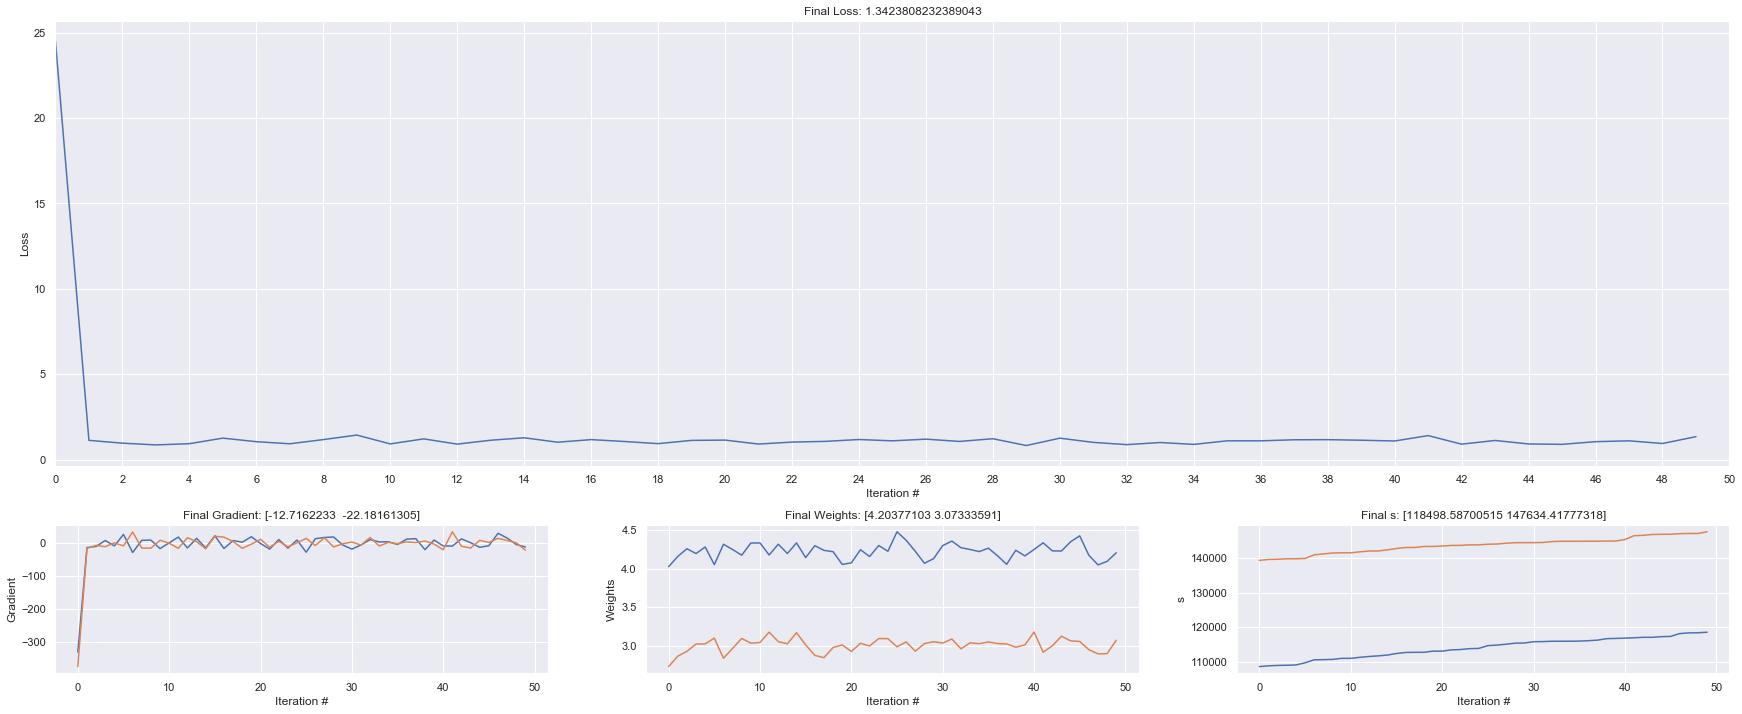

In [37]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
W = np.random.normal(size=2)
lr = 3
s = 0
e = 10 ** -2
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        s = s + grad ** 2
        s_history.append(s)
        W = W - lr/np.sqrt(s + e) * grad
        weights_history.append(W)
        
gs=GridSpec(2,3,height_ratios=[3, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[1,2])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')

# Adadelta

Text(0, 0.5, 'delta_w')

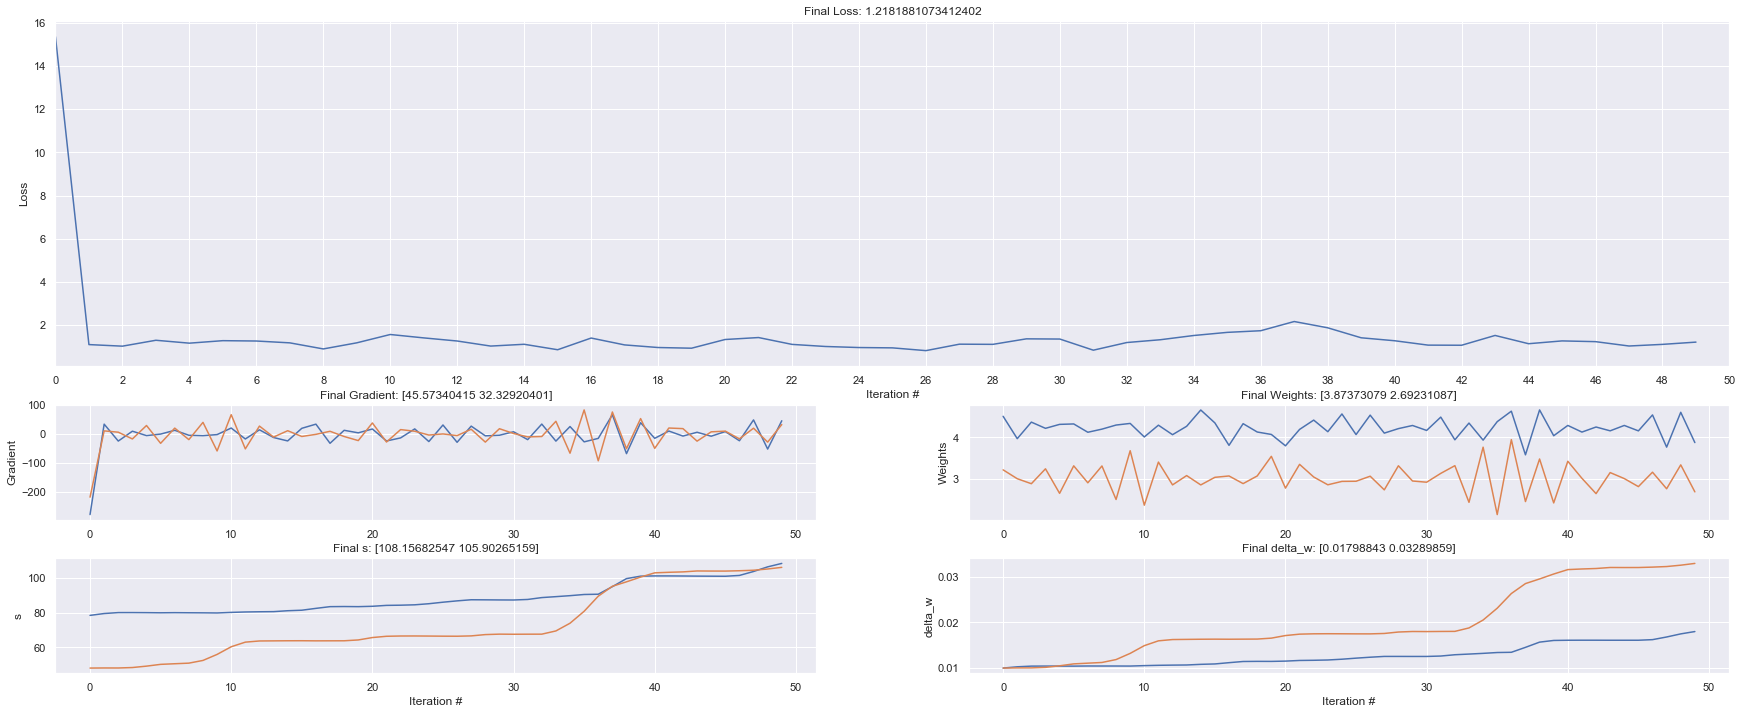

In [38]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
delta_w_history = []
W = np.random.normal(size=2)
lr = 1
rho = 0.999
e = 10 ** -2
delta_w = 0
s = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        s = rho * s + (1 - rho) * grad ** 2
        s_history.append(s)
        grad_ = np.sqrt((delta_w + e) / (s + e)) * grad
        W = W - grad_
        weights_history.append(W)
        delta_w = rho * delta_w + (1 - rho) * grad_ ** 2
        delta_w_history.append(delta_w)
        
gs=GridSpec(3,2,height_ratios=[3, 1, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[2,0])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')
ax4 = plt.subplot(gs[2,1])
ax4.plot(delta_w_history)
ax4.set_title('Final delta_w: ' + str(delta_w_history[-1]))
ax4.set_xlabel('Iteration #')
ax4.set_ylabel('delta_w')

# Adam

Text(0, 0.5, 'Momentum')

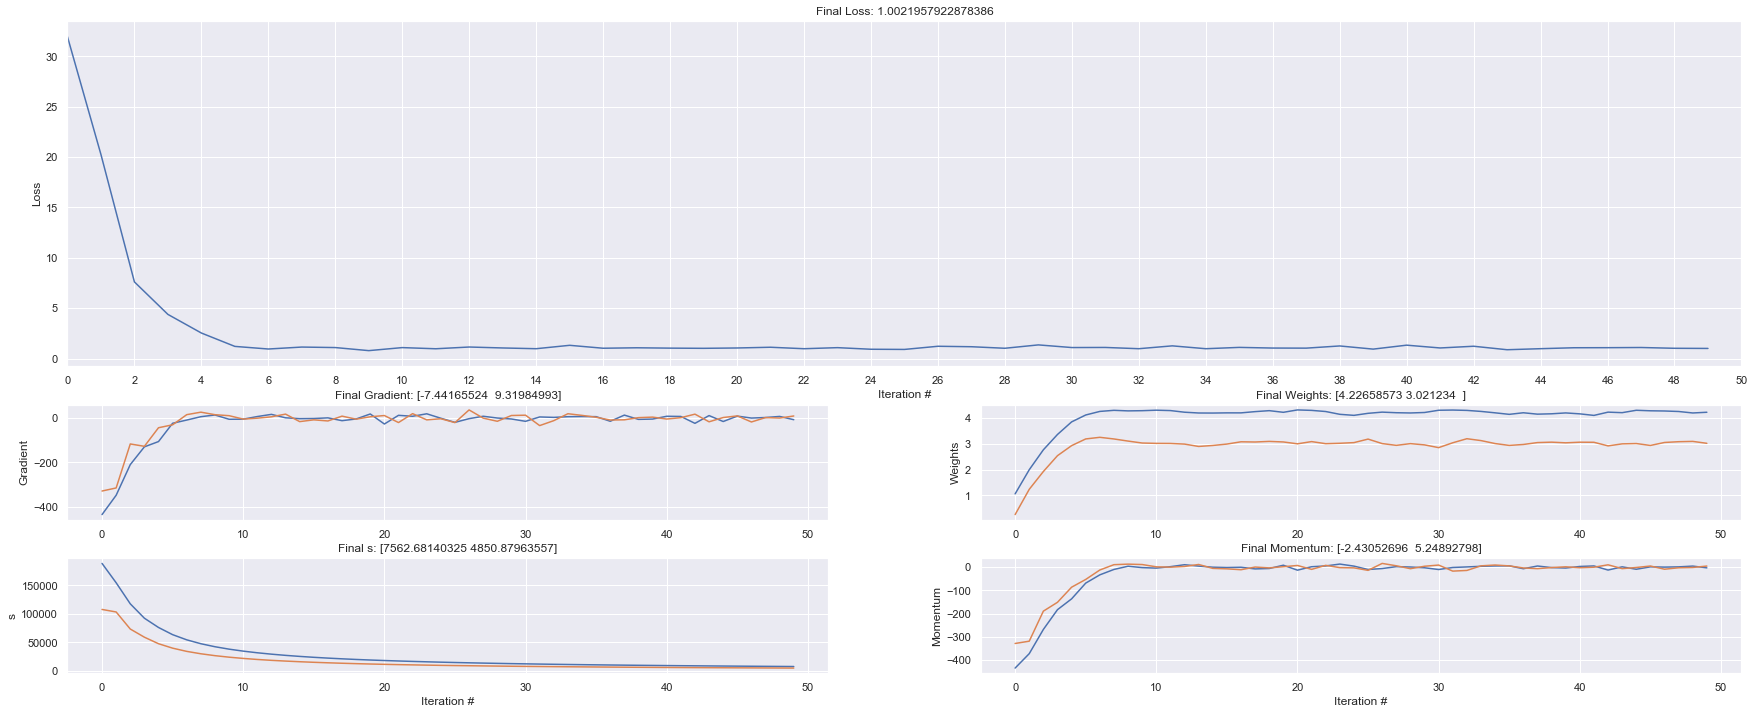

In [41]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
momentum_history = []
W = np.random.normal(size=2)
lr = .99
beta_1 = 0.4
beta_2 = 0.999
v = 0
s = 0
e = 10 ** -6
t = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        t += 1
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        v = beta_1 * v + (1-beta_1) * grad
        s = beta_2 * s + (1 - beta_2) * grad ** 2
        v_bias_corr = v / (1 - beta_1 ** t)
        momentum_history.append(v_bias_corr)
        s_bias_corr = s / (1 - beta_2 ** t)
        s_history.append(s_bias_corr)
        grad_ = lr * v_bias_corr / (np.sqrt(s_bias_corr) + e)
        W = W - grad_
        weights_history.append(W)
        
gs=GridSpec(3,2,height_ratios=[3, 1, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[2,0])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')
ax4 = plt.subplot(gs[2,1])
ax4.plot(momentum_history)
ax4.set_title('Final Momentum: ' + str(momentum_history[-1]))
ax4.set_xlabel('Iteration #')
ax4.set_ylabel('Momentum')

# Adamax

Text(0, 0.5, 'Momentum')

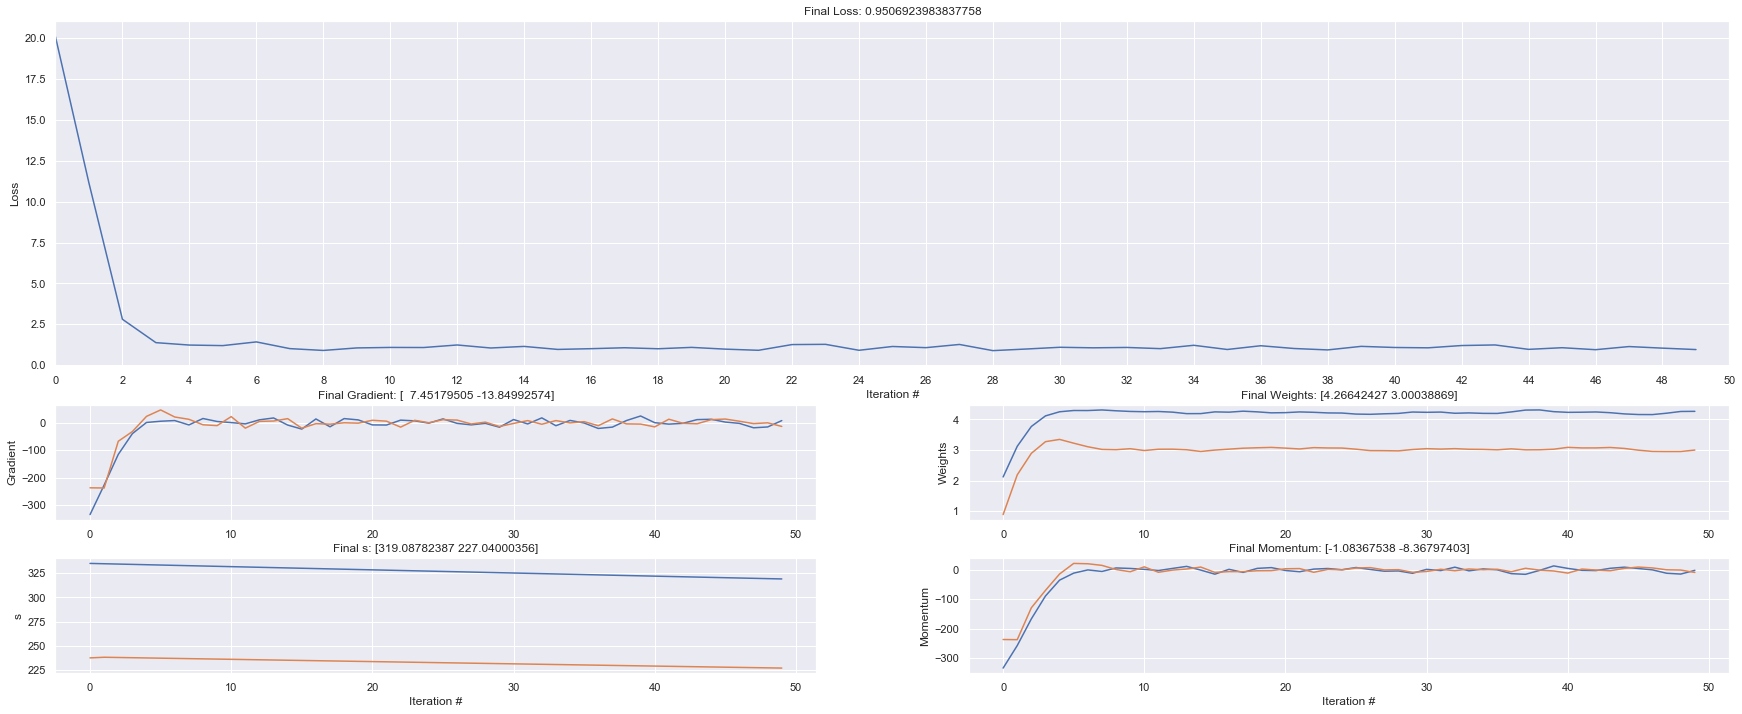

In [43]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
momentum_history = []
W = np.random.normal(size=2)
lr = 1.3
beta_1 = 0.4
beta_2 = 0.999
v = 0
s = 0
e = 10 ** -8
t = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        t += 1
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        v = beta_1 * v + (1 - beta_1) * grad
        s = np.maximum(beta_2 * s,np.abs(grad))
        v_bias_corr = v / (1 - beta_1 ** t)
        momentum_history.append(v_bias_corr)
        s_history.append(s)
        grad_ = lr * v_bias_corr / s
        W = W - grad_
        weights_history.append(W)
        
gs=GridSpec(3,2,height_ratios=[3, 1, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[2,0])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')
ax4 = plt.subplot(gs[2,1])
ax4.plot(momentum_history)
ax4.set_title('Final Momentum: ' + str(momentum_history[-1]))
ax4.set_xlabel('Iteration #')
ax4.set_ylabel('Momentum')

# Nadam

Text(0, 0.5, 'Momentum')

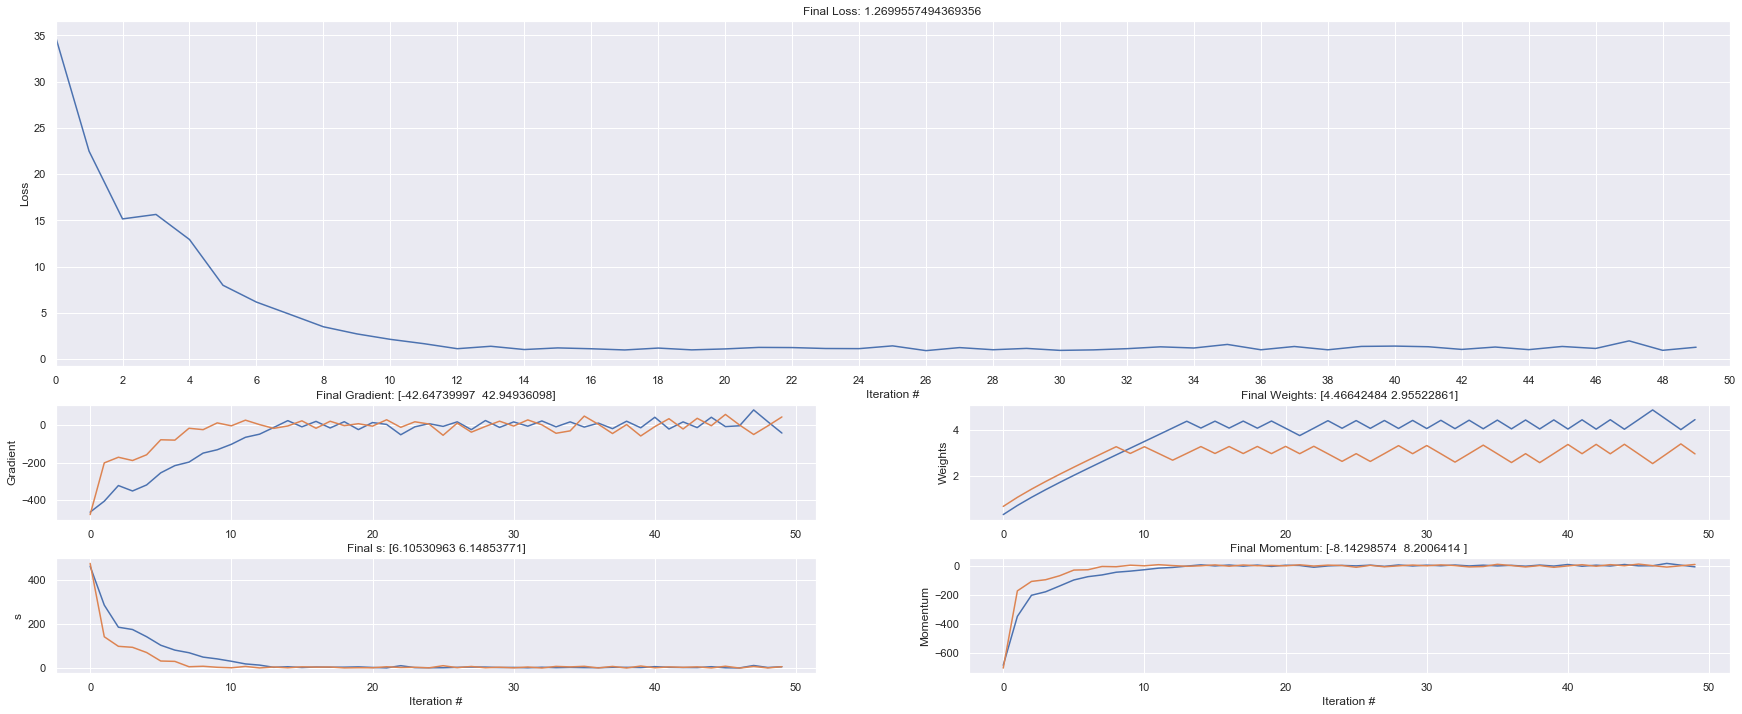

In [68]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
momentum_history = []
W = np.random.normal(size=2)
lr = 0.33
beta_1 = 0.9
beta_2 = 0.999
v = 0
s = 0
e = 10 ** -9
t = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        t += 1
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        beta_1_t = beta_1 * (1-beta_1**(t-1)) / (1-beta_1**t)
        beta_1_tp1 = beta_1 * (1-beta_1**t) / (1-beta_1**(t+1))
        beta_2_t = beta_2 * (1-beta_2**(t-1)) / (1-beta_2 ** t)
        v_t = beta_1_t * v + (1-beta_1_t) * grad
        vbar_t = beta_1_tp1 * v_t + (1-beta_1_t)*grad
        s_t = beta_2_t*s + (1-beta_2_t)* grad**2
        sbar_t = np.sqrt(s_t) + e
        grad_ = lr * vbar_t / sbar_t
        momentum_history.append(vbar_t)
        s_history.append(sbar_t)
        W = W - grad_
        weights_history.append(W)
        
gs=GridSpec(3,2,height_ratios=[3, 1, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[2,0])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')
ax4 = plt.subplot(gs[2,1])
ax4.plot(momentum_history)
ax4.set_title('Final Momentum: ' + str(momentum_history[-1]))
ax4.set_xlabel('Iteration #')
ax4.set_ylabel('Momentum')

# Nadamax

Text(0, 0.5, 'Momentum')

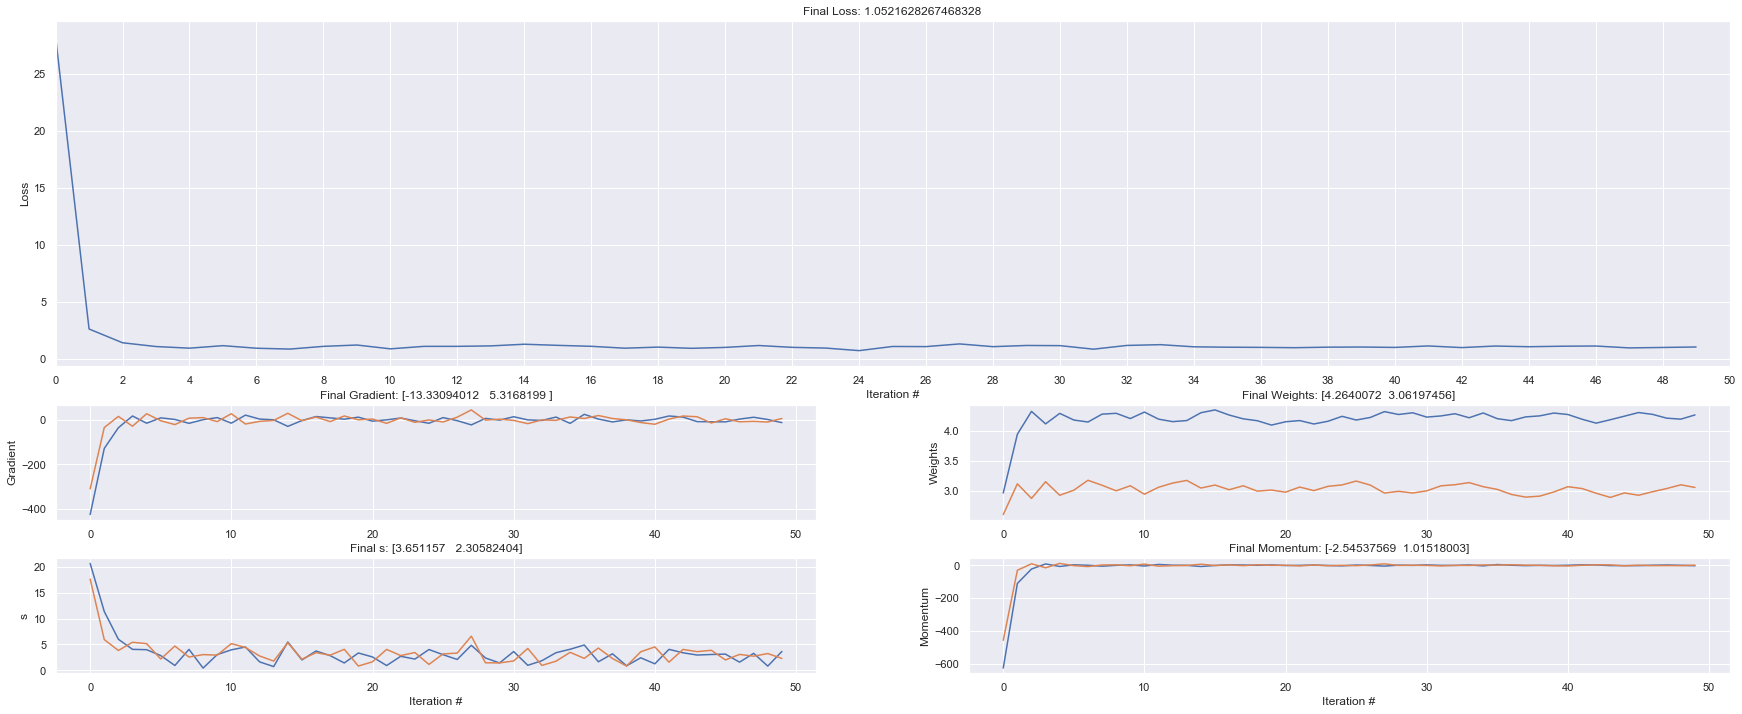

In [71]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
momentum_history = []
W = np.random.normal(size=2)
lr = 0.1
beta_1 = 0.9
beta_2 = 0.999
v = 0
s = 0
e = 10 ** -6
t = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        t += 1
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        beta_1_t = beta_1 * (1-beta_1**(t-1)) / (1-beta_1**t)
        beta_1_tp1 = beta_1 * (1-beta_1**t) / (1-beta_1**(t+1))
        beta_2_t = beta_2 * (1-beta_2**(t-1)) / (1-beta_2 ** t)
        v_t = beta_1_t * v + (1-beta_1_t) * grad
        vbar_t = beta_1_tp1 * v_t + (1-beta_1_t)*grad
        s_t = np.maximum(beta_2_t*s ,np.abs(grad))
        sbar_t = np.sqrt(s_t) + e
        grad_ = lr * vbar_t / sbar_t
        momentum_history.append(vbar_t)
        s_history.append(sbar_t)
        W = W - grad_
        weights_history.append(W)
        
gs=GridSpec(3,2,height_ratios=[3, 1, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[2,0])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')
ax4 = plt.subplot(gs[2,1])
ax4.plot(momentum_history)
ax4.set_title('Final Momentum: ' + str(momentum_history[-1]))
ax4.set_xlabel('Iteration #')
ax4.set_ylabel('Momentum')

# AMSGrad

Text(0, 0.5, 'Momentum')

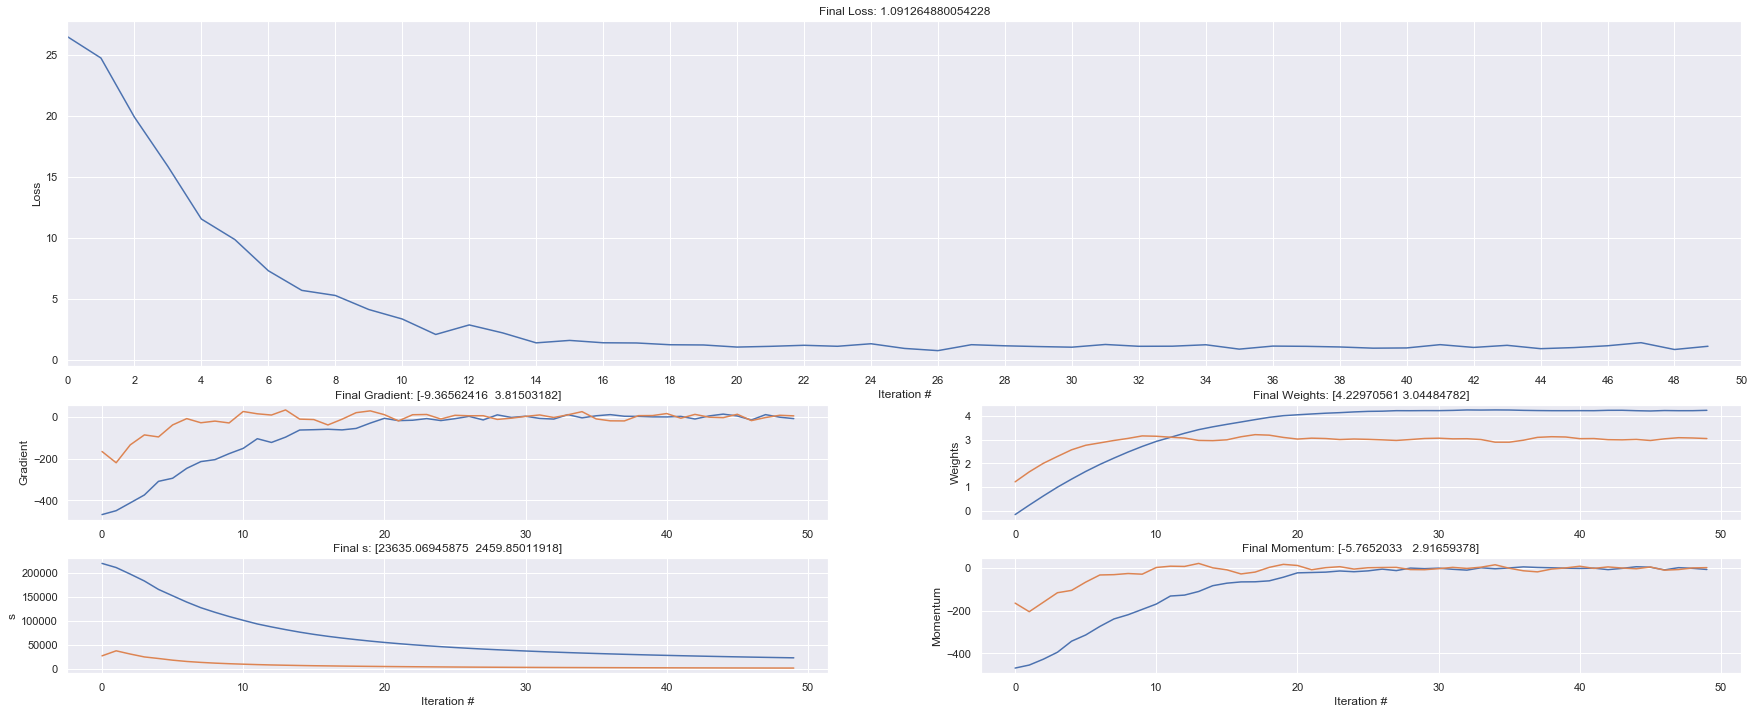

In [75]:
epochs = 5
batch_size = 100
weights_history = []
loss_history = []
gradient_history = []
s_history = []
momentum_history = []
W = np.random.normal(size=2)
lr = 0.4
beta_1 = 0.4
beta_2 = 0.999
s = 0
e = 10 ** -8
t = 0
for epoch in range(1, epochs + 1):
    for batch_i, data, label in data_iter(batch_size):
        t += 1
        err = np.dot(data,W) - label
        loss = np.dot(err,err)/len(data)
        loss_history.append(loss)
        grad = np.dot(data.T, err)
        gradient_history.append(grad)
        v = beta_1 * v + (1-beta_1) * grad
        s = np.maximum(beta_2 * s + (1 - beta_2) * grad ** 2, s)
        v_bias_corr = v / (1 - beta_1 ** t)
        s_bias_corr = s / (1 - beta_2 ** t)
        momentum_history.append(v_bias_corr)
        s_history.append(s_bias_corr)
        grad_ = lr * v_bias_corr / (np.sqrt(s_bias_corr) + e)
        W = W - grad_
        weights_history.append(W)
        
gs=GridSpec(3,2,height_ratios=[3, 1, 1]) # 2 rows, 3 columns
loc = plticker.MultipleLocator(base=2) 
fig = plt.figure(figsize=(30, 12)) 
ax0 = plt.subplot(gs[0,:])
ax0.plot(loss_history)
ax0.set_title('Final Loss: ' + str(loss_history[-1]))
ax0.xaxis.set_major_locator(loc)
ax0.set_xlim(0, len(loss_history))
ax0.set_xlabel('Iteration #')
ax0.set_ylabel('Loss')
ax1 = plt.subplot(gs[1,0])
ax1.plot(gradient_history)
ax1.set_title('Final Gradient: ' + str(gradient_history[-1]))
ax1.set_ylabel('Gradient')
ax2 = plt.subplot(gs[1,1])
ax2.plot(weights_history)
ax2.set_title('Final Weights: ' + str(weights_history[-1]))
ax2.set_ylabel('Weights')
ax3 = plt.subplot(gs[2,0])
ax3.plot(s_history)
ax3.set_title('Final s: ' + str(s_history[-1]))
ax3.set_xlabel('Iteration #')
ax3.set_ylabel('s')
ax4 = plt.subplot(gs[2,1])
ax4.plot(momentum_history)
ax4.set_title('Final Momentum: ' + str(momentum_history[-1]))
ax4.set_xlabel('Iteration #')
ax4.set_ylabel('Momentum')